In [ ]:
pip install numpy pandas plotly dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


<ipython-input-4-d94787eb6aba>:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-4-d94787eb6aba>:6: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/6th semG..csv')

In [ ]:
col=['usn','gender','cg1','cg2','cg3','cg4','cg5']
data.columns=col

In [ ]:
data=data.replace(to_replace=8017.0,value=8.17)

In [ ]:
outlier = data[(data['cg1']>10) | (data['cg2']>10) | (data['cg3']>10) | (data['cg4']>10) | (data['cg5']>10) ]
print(type(outlier))
outlier

<class 'pandas.core.frame.DataFrame'>


,usn,gender,cg1,cg2,cg3,cg4,cg5


In [ ]:
usn=data['usn']
gender=data['gender']
cg1=data['cg1']
cg2=data['cg2']
cg3=data['cg3']
cg4=data['cg4']
cg5=data['cg5']

In [ ]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
LinR = LinearRegression()
X = data.drop(['usn','gender','cg5'],axis=1)
y = data['cg5']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)
m = AdaBoostRegressor(base_estimator=LinR,random_state=2)
m.fit(X_train,y_train)
predictions = m.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

mean_squared_error :  0.5064711182307009
mean_absolute_error :  0.6488148637753705
Root Mean Squared Error: 0.7116678426279361


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
pd.DataFrame( np.c_[y_test,predictions], columns = ["Actual_Marks","Predicted_Marks"] )

,Actual_Marks,Predicted_Marks
0,9.39,8.960233
1,9.70,8.808155
2,6.96,6.956060
3,10.00,8.966745
4,8.65,9.605848
5,8.48,7.814403
6,9.22,8.830821
7,8.74,9.103799
8,7.48,8.451441
9,9.04,9.476650


In [ ]:
a=[9.43,9.63,9.13,9.42]
b = np.array(a).reshape(1, -1)
p=m.predict(b)
print(p)

[8.86257994]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [ ]:
pred = m.predict(X)
print(pred)

[8.2076478  7.61422853 7.76714215 9.20538294 0.50527822 6.0794162
 8.4954842  8.46669917 3.92227979 8.58495422 5.19087635 7.814403
 8.07781001 9.19742419 9.47664981 9.59438775 8.86806753 7.11752491
 8.48828508 8.98322043 8.91577926 8.79550691 8.53994245 8.06449874
 8.85959285 9.03065349 6.20903005 3.4035928  8.23101062 7.87105224
 8.86189062 5.37740561 8.72566583 8.16343786 8.12856584 9.10379932
 7.28312898 8.18481481 7.80101344 9.04140115 7.99738579 9.38939748
 8.52105546 7.63109879 8.96023339 7.67563641 8.2835526  8.80815529
 6.94826048 9.20921174 8.9717194  8.35938835 9.43463192 8.68472824
 8.25342766 8.68157997 9.16077081 8.10192399 8.30678393 8.96710563
 8.23149291 9.1759065  8.40943737 8.52256788 8.73419031 9.11114799
 8.96674495 8.44295431 8.55023987 8.7677367  7.96774921 9.19114432
 8.78088058 9.23847857 9.47560804 5.38416817 9.7271949  6.8692684
 8.83082129 9.16166838 9.09889402 7.60126299 8.26570885 8.91527098
 8.71966821 5.89429686 7.80396794 6.06143342 5.16976026 8.25278497

In [ ]:
actual_marks=y
d = pd.DataFrame({'USN': usn, 'Actual_Marks': actual_marks, 'Predicted_Marks': pred})

In [ ]:
d['Predicted_Marks']

0      8.207648
1      7.614229
2      7.767142
3      9.205383
4      0.505278
         ...   
161    7.923413
162    8.105241
163    6.133560
164    8.862580
165    7.056936
Name: Predicted_Marks, Length: 166, dtype: float64

**VISUALISATIONS**

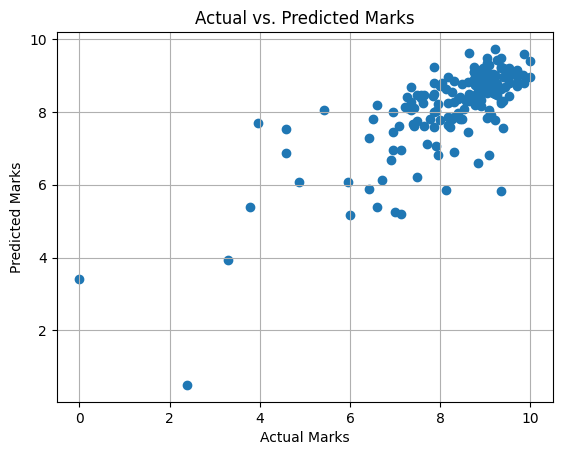

In [ ]:
# Scatter plot for actual vs. predicted marks
import matplotlib.pyplot as plt
plt.scatter(d['Actual_Marks'], d['Predicted_Marks'])
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs. Predicted Marks')
plt.grid(True)
plt.show()


In [ ]:
df = pd.DataFrame({'USN':usn, 'Gender': gender, 'Sem1':cg1, 'Sem2': cg2,
                   'Sem3': cg3, 'Sem4': cg4, 'Actual_Marks':cg5 , 'Predicted_Marks': pred})

In [ ]:
# Scatter plot for actual vs. predicted marks with hover information
fig = px.scatter(df, x='Actual_Marks', y='Predicted_Marks', color='Gender', hover_data=['USN', 'Sem1', 'Sem2', 'Sem3', 'Sem4', 'Actual_Marks'])

# Update the layout
fig.update_layout(title='Actual vs. Predicted Marks with Gender Information',
                  xaxis_title='Actual Marks',
                  yaxis_title='Predicted Marks',
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True),
                  plot_bgcolor='white'
)

# Show the plot
fig.show()


In [ ]:
# Calculate the residuals
df['Residuals'] = df['Actual_Marks'] - df['Predicted_Marks']

# Scatter plot for predicted marks vs. residuals with hover information
fig_residuals = px.scatter(df, x='Predicted_Marks', y='Residuals', color='Gender', hover_data=['USN', 'Sem1', 'Sem2', 'Sem3', 'Sem4', 'Actual_Marks'])

# Add a horizontal line at y=0 to indicate zero residuals
fig_residuals.add_shape(type='line', x0=df['Predicted_Marks'].min(), x1=df['Predicted_Marks'].max(), y0=0, y1=0, line=dict(color='red', width=2, dash='dash'))

# Update the layout
fig_residuals.update_layout(title='Residual Plot with Gender Information',
                            xaxis_title='Predicted Marks',
                            yaxis_title='Residuals',
                            xaxis=dict(showgrid=True),
                            yaxis=dict(showgrid=True),
                            plot_bgcolor='white'
)

# Show the plot
fig_residuals.show()


In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1("Regression Model Visualization"),

    # Scatter plot for actual vs. predicted marks
    dcc.Graph(figure=fig),

    # Scatter plot for predicted marks vs. residuals
    dcc.Graph(figure=fig_residuals)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
pip install pandas matplotlib seaborn plotly


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


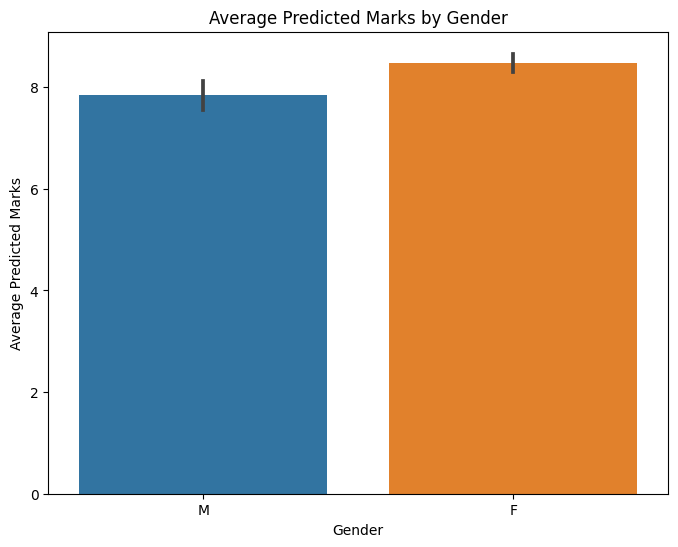

In [ ]:
# Bar chart to compare average marks by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Predicted_Marks', data=df)
plt.title('Average Predicted Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Predicted Marks')
plt.show()


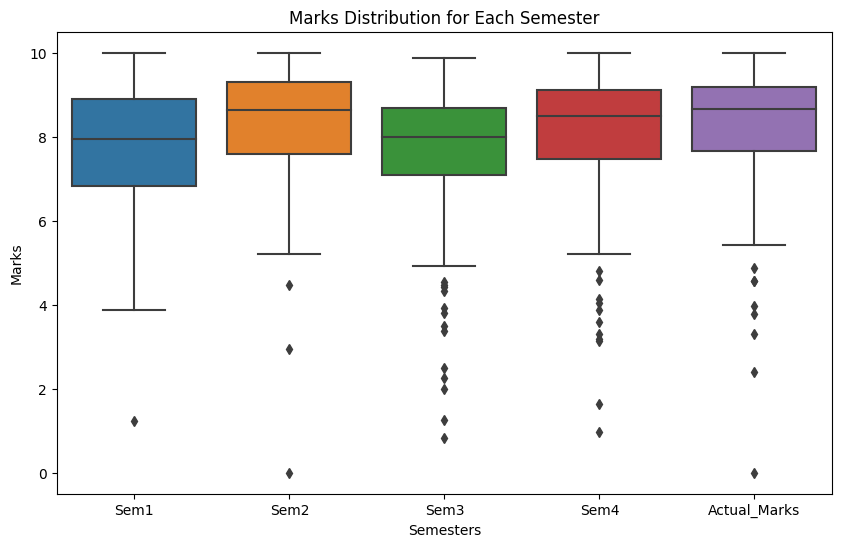

In [ ]:
# Box plot to compare marks distribution for each semester
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sem1', 'Sem2', 'Sem3', 'Sem4', 'Actual_Marks']])
plt.title('Marks Distribution for Each Semester')
plt.xlabel('Semesters')
plt.ylabel('Marks')
plt.show()


In [ ]:
# Scatter plot for actual vs. predicted marks with hover information
fig = px.scatter(df, x='Predicted_Marks', y='Actual_Marks', color='Gender', hover_data=['USN', 'Sem1', 'Sem2', 'Sem3', 'Sem4'])
fig.update_layout(title='Predicted Marks vs. Sem5 Marks with Gender Information',
                  xaxis_title='Predicted Marks',
                  yaxis_title='Actual Marks'
)
fig.show()


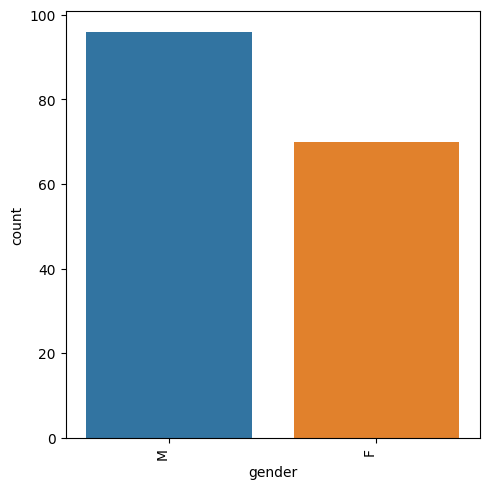

In [ ]:
#COUNT PLOT OF GENDER
plt.figure(figsize=(5, 5))
axis = sns.countplot(x=data['gender'], data = data,
              order=data['gender'].value_counts().iloc[:2].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

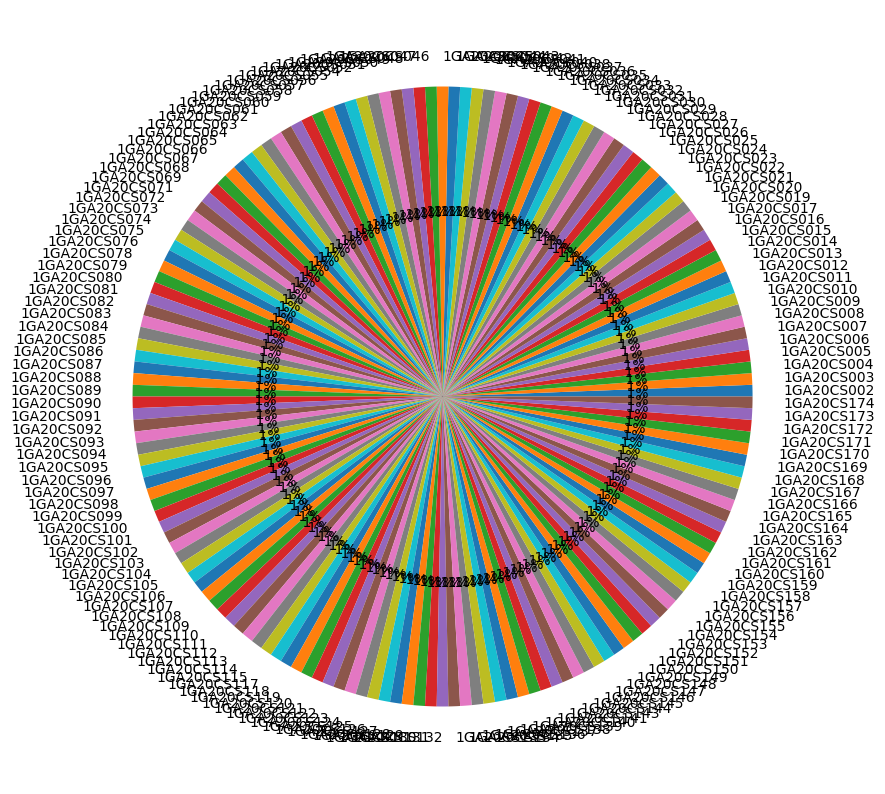

In [ ]:
#PIE CHART BASED ON THE UNIQUE VALUES OF THE FEATURES
axis = plt.subplots(figsize=(10,14))
Name = df["USN"].unique()
size = df["USN"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

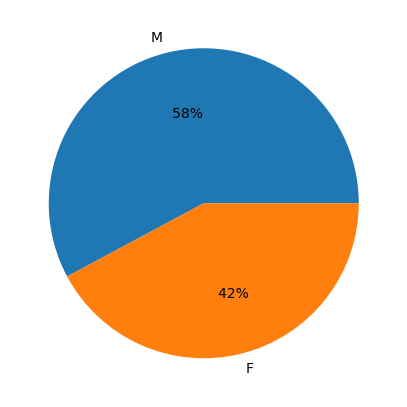

In [ ]:
axis = plt.subplots(figsize=(5,10))
Name = data["gender"].unique()
size = data["gender"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

<ipython-input-25-d4b61e258343>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



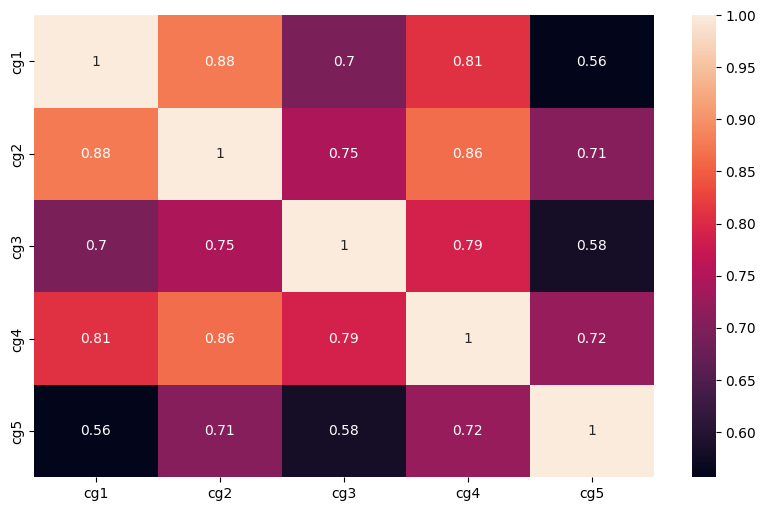

In [ ]:
#CORRELATION GRAPH
axis = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(),annot = True)
plt.show()